In [1]:
from model3D import *
from data import *
import numpy as np 
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import np_utils

Using TensorFlow backend.


## Train 3D UNet
Data is in folder /data

The input shape of image: (num_z_img, batch_size, rows, cols, channel = 1) (4x256x256x1)

The input shape of mask: (num_z_img, batch_size, rows,cols, channel = 3) (4x256x256x3)

### Train 3D With Early Stopping

/home/ubuntu/unet-aws/model3D.py:128: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = outputs)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 4, 256, 256,  0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 4, 256, 256,  896         input_1[0][0]                    
__________________________________________________________________________________________________
conv3d_2 (Conv3D)               (None, 4, 256, 256,  27680       conv3d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 4, 256, 256,  128         conv3d_2[0][0]                   
__________________________________________________________________________________________________
max_poolin

Train on 729 samples, validate on 91 samples
Epoch 1/25
729/729 [==============================] - 102s 140ms/step - loss: 0.3905 - dice_coef: 0.6095 - val_loss: 0.3421 - val_dice_coef: 0.6579

Epoch 00001: loss improved from inf to 0.39051, saving model to unet_membrane.hdf5
Epoch 2/25
729/729 [==============================] - 87s 119ms/step - loss: 0.3187 - dice_coef: 0.6813 - val_loss: 0.3220 - val_dice_coef: 0.6780

Epoch 00002: loss improved from 0.39051 to 0.31870, saving model to unet_membrane.hdf5
Epoch 3/25
729/729 [==============================] - 87s 119ms/step - loss: 0.2960 - dice_coef: 0.7040 - val_loss: 0.2900 - val_dice_coef: 0.7100

Epoch 00003: loss improved from 0.31870 to 0.29604, saving model to unet_membrane.hdf5
Epoch 4/25
729/729 [==============================] - 87s 119ms/step - loss: 0.2705 - dice_coef: 0.7295 - val_loss: 0.2699 - val_dice_coef: 0.7301

Epoch 00004: loss improved from 0.29604 to 0.27047, saving model to unet_membrane.hdf5
Epoch 5/25
729/729

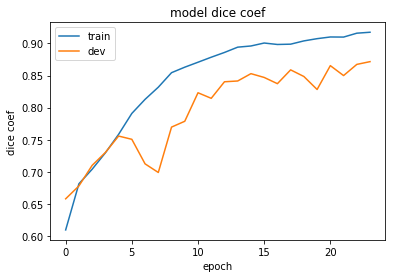

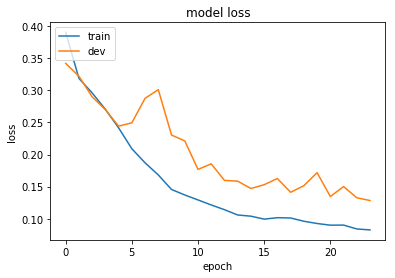

In [2]:
callbacks = [
    EarlyStopping(monitor='loss', min_delta=0.02, patience=8, verbose=0),
    ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose = 1, save_best_only = True),
]

images = train_all_3d_new(as_gray = True)
labels = label_all_3d_new(as_gray = True)

# Train, Valid, Test Split: 80,10,10
x_train, x_valid, y_train, y_valid = train_test_split(images, labels, test_size=0.2, shuffle= True, random_state=1)
x_dev, x_test, y_dev, y_test = train_test_split(x_valid, y_valid, test_size=0.5, shuffle= True, random_state=1)

model = unet3d()
history = model.fit(x_train, y_train, validation_data=(x_dev, y_dev), batch_size = 4, epochs = 25, callbacks = callbacks)

print(history.history.keys())

# summarize history for dice score
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice coef')
plt.ylabel('dice coef')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

### Test Model and Save Predicted Results

In [4]:
# comment out to get test score on original data
# comment in following line to get score on new novel data (generalized score)
x_test=test_train_new_3d(as_gray = True)
y_test=test_label_new_3d(as_gray = True)

model = unet3d()
model.load_weights("unet_membrane.hdf5")

results = model.predict(x_test, verbose=1)

test_loss = soft_dice_coef(results, y_test)
print("Test Score: ", test_loss)

save_label_3d (y_test)
save_result_3d ("data/test_result",results)


/home/ubuntu/unet-aws/model3D.py:128: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = outputs)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 4, 256, 256,  0                                            
__________________________________________________________________________________________________
conv3d_47 (Conv3D)              (None, 4, 256, 256,  896         input_3[0][0]                    
__________________________________________________________________________________________________
conv3d_48 (Conv3D)              (None, 4, 256, 256,  27680       conv3d_47[0][0]                  
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 4, 256, 256,  128         conv3d_48[0][0]                  
__________________________________________________________________________________________________
max_poolin

35/35 [==============================] - 2s 49ms/step
Test Score:  0.8017675532143325
